In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # For 3D visualization


In [8]:

# Load dataset
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Dataset info
print("\nDataset Info:")
print(df.info())



Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Rename columns for clarity
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

# Drop CustomerID (not useful for clustering)
df = df.drop(columns=['CustomerID'])

# Convert categorical column 'Gender' to numerical (0 = Male, 1 = Female)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardize numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)



Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


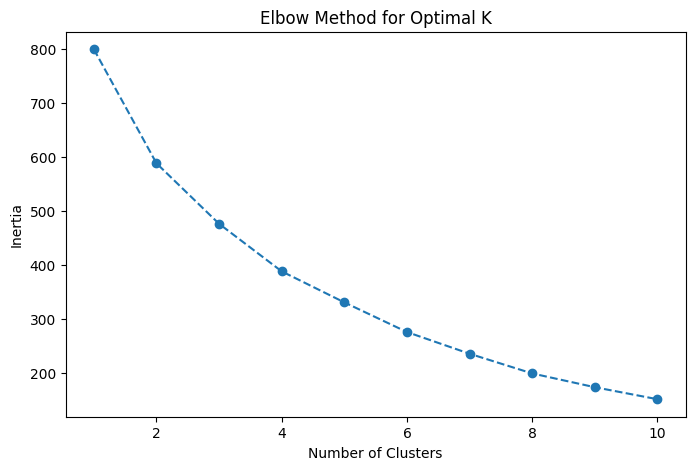

In [10]:

# ---------------------------------
# Apply K-Means Clustering
# ---------------------------------
# Find the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Train K-Means with the optimal number of clusters (assuming 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)


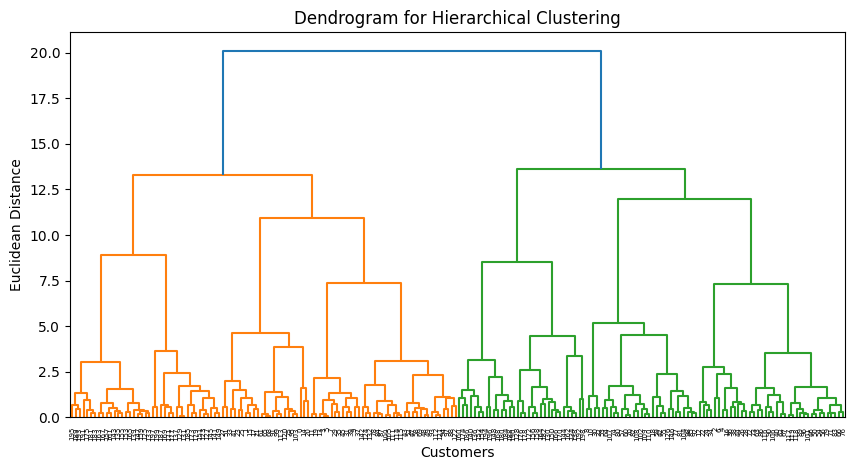

In [11]:


# ---------------------------------
# Apply Hierarchical Clustering
# ---------------------------------
# Create a Dendrogram
plt.figure(figsize=(10, 5))
dend = dendrogram(linkage(scaled_data, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# Fit Hierarchical Clustering Model
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(scaled_data)



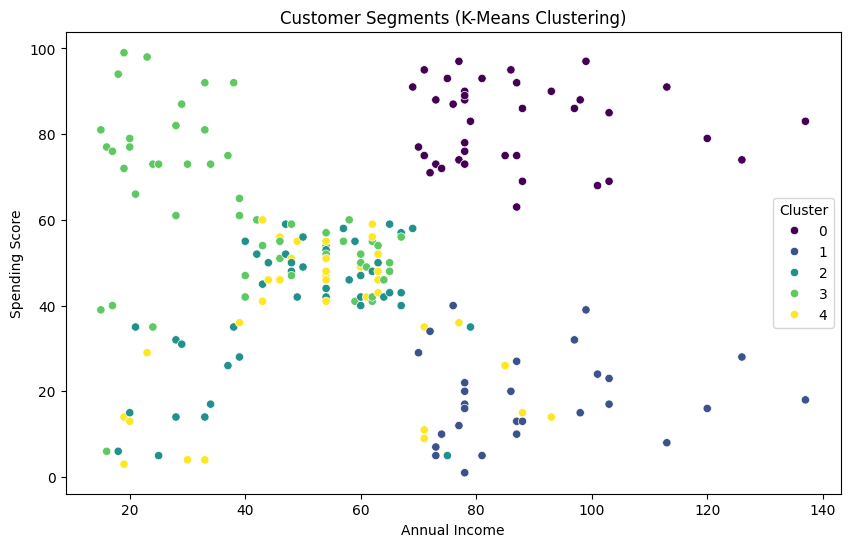

In [12]:
# ---------------------------------
# Visualizing the Segments
# ---------------------------------
# Scatter Plot for K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title="Cluster")
plt.show()


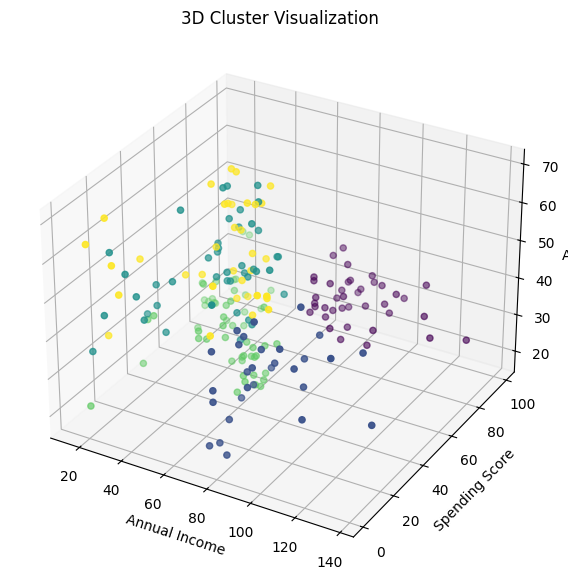

In [13]:

# 3D Scatter Plot for Better Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Annual_Income'], df['Spending_Score'], df['Age'], c=df['KMeans_Cluster'], cmap='viridis')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')
ax.set_title('3D Cluster Visualization')
plt.show()


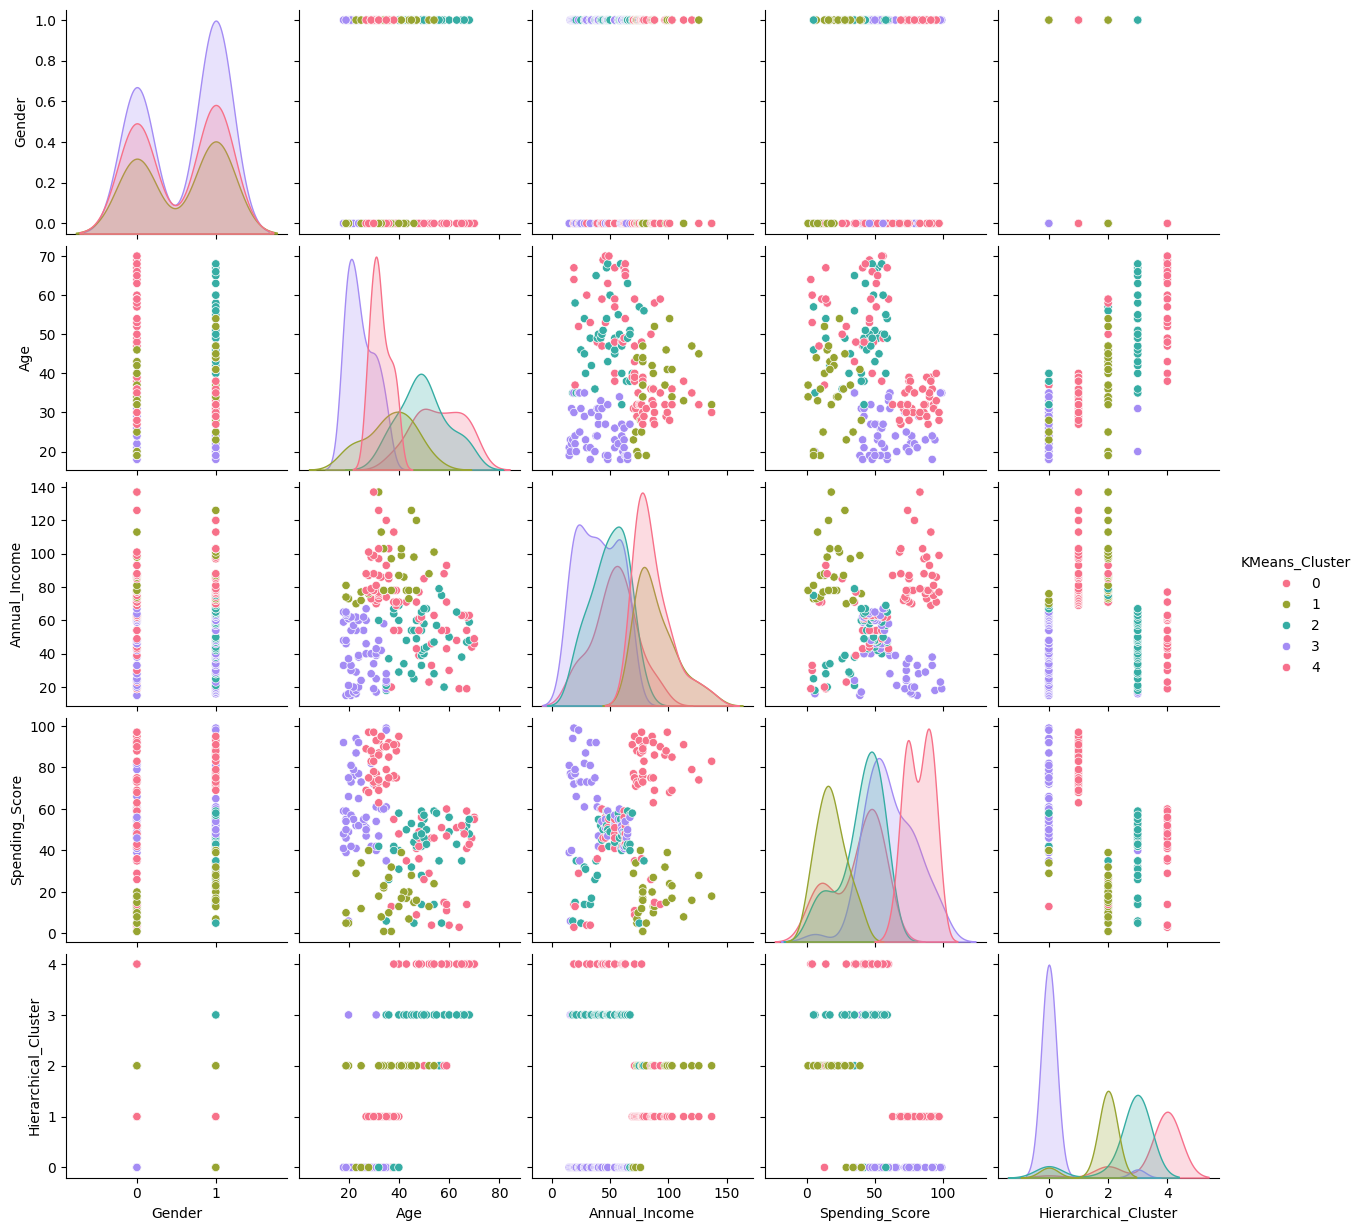

In [14]:

# Pairplot to visualize cluster relationships
sns.pairplot(df, hue='KMeans_Cluster', palette='husl')
plt.show()


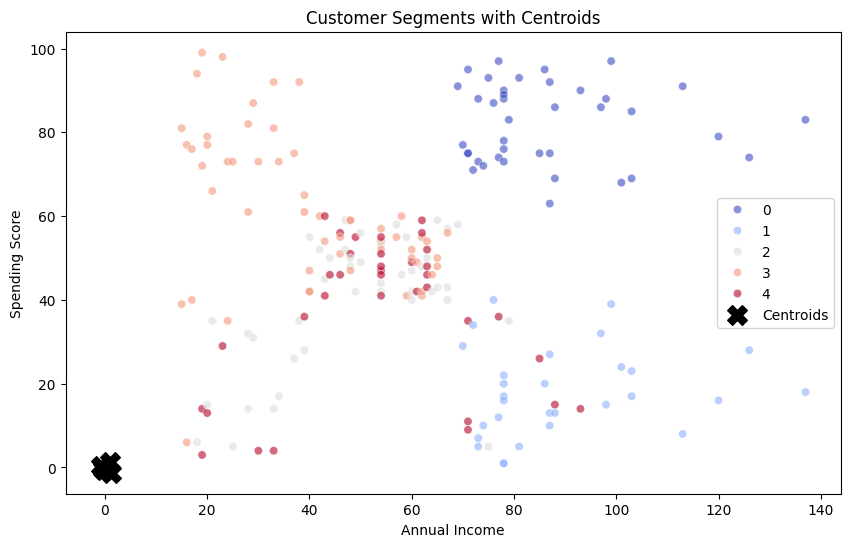

<ipython-input-15-c97afad72597>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['KMeans_Cluster'], palette='pastel')


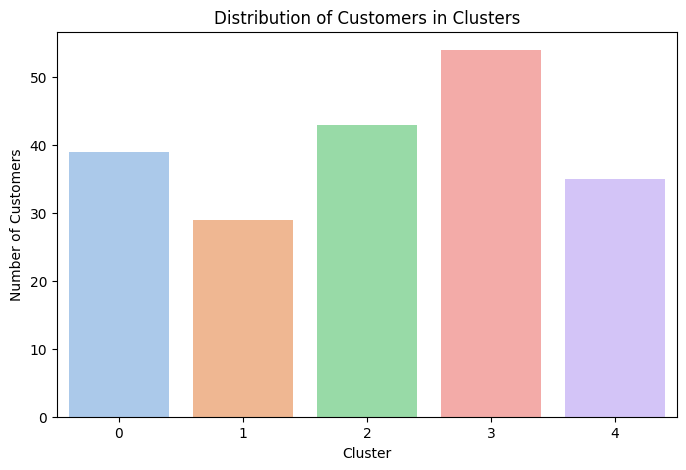

In [15]:
# Cluster Centroids Overlay
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['KMeans_Cluster'], palette='coolwarm', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='black', marker='X', s=200, label='Centroids')
plt.title('Customer Segments with Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Bar Plot to show number of customers in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x=df['KMeans_Cluster'], palette='pastel')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers in Clusters')
plt.show()



In [17]:

# Print dataset with clusters
print("\nDataset with Cluster Labels:")
print(df.head())

# Insights:
# Elbow Method determines the best number of clusters.
# K-Means efficiently groups customers by income & spending.
# Hierarchical Clustering provides a tree-based structure.
# Scatter plots visualize customer segmentation clearly.



Dataset with Cluster Labels:
   Gender  Age  Annual_Income  Spending_Score  KMeans_Cluster  \
0       0   19             15              39               3   
1       0   21             15              81               3   
2       1   20             16               6               3   
3       1   23             16              77               3   
4       1   31             17              40               3   

   Hierarchical_Cluster  
0                     0  
1                     0  
2                     3  
3                     0  
4                     3  
